__This script visualizes the temporal development of various SimMod output variables and compares them to the RCP literature values.__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 25
import pandas as pd

In [2]:
RCP_PATH = "../data/preprocessed/"
SIMMOD_PATH = "../../SimMod/results/"
SIMMOD_TAG_85 = "200828-112329-pulse_response-rcp85"
SIMMOD_TAG_60 = "200828-112347-pulse_response-rcp60"
SIMMOD_TAG_45 = "200828-112406-pulse_response-rcp45"
SIMMOD_TAG_26 = "200828-112429-pulse_response-rcp26"

FIGURE_SIZE = (12, 12)

In [3]:
# Baseline [BL, BU]
BL = 1961
BU = 1990

# Read SimMod data
simmod85 = pd.read_csv(SIMMOD_PATH+SIMMOD_TAG_85+"/results.csv")
simmod60 = pd.read_csv(SIMMOD_PATH+SIMMOD_TAG_60+"/results.csv")
simmod45 = pd.read_csv(SIMMOD_PATH+SIMMOD_TAG_45+"/results.csv")
simmod26 = pd.read_csv(SIMMOD_PATH+SIMMOD_TAG_26+"/results.csv")

# Normalize temperatures to baseline
simmod85['t_s'] = simmod85['t_s']-simmod85[(simmod85['year']>=BL) & (simmod85['year']<=BU)]['t_s'].mean()
simmod60['t_s'] = simmod60['t_s']-simmod60[(simmod60['year']>=BL) & (simmod60['year']<=BU)]['t_s'].mean()
simmod45['t_s'] = simmod45['t_s']-simmod45[(simmod45['year']>=BL) & (simmod45['year']<=BU)]['t_s'].mean()
simmod26['t_s'] = simmod26['t_s']-simmod26[(simmod26['year']>=BL) & (simmod26['year']<=BU)]['t_s'].mean()

In [4]:
# Read RCP data
rcp85 = pd.read_csv(RCP_PATH+"rcp_8.5_data.csv")
rcp60 = pd.read_csv(RCP_PATH+"rcp_6.0_data.csv")
rcp45 = pd.read_csv(RCP_PATH+"rcp_4.5_data.csv")
rcp26 = pd.read_csv(RCP_PATH+"rcp_2.6_data.csv")

In [5]:
for k in simmod26:
    print(k)

Unnamed: 0
date
year
co2_pg
ch4_tg
n2o_tg
co2_forcing_rcp
ch4_forcing_rcp
n2o_forcing_rcp
total_forcing_rcp
rcp_co2_ppm
rcp_ch4_ppb
rcp_n2o_ppb
co2_pg_atm
ch4_tg_atm
n2o_tg_atm
ch4_co2_decay_marginal
co2_ppm
ch4_ppb
n2o_ppb
co2_forcing
ch4_forcing
n2o_forcing
total_forcing_ghg
rcp_nonghg_forcing
total_forcing
t_os
t_eq
t_s


In [6]:
for k in rcp26:
    print(k)

Unnamed: 0
year
ch4_emissions_tg
n2o_emissions_tg
c_emissions_pg
co2_concentration_ppm
ch4_concentration_ppb
n2o_concentration_ppb
co2_forcing_wm2
ch4_forcing_wm2
n2o_forcing_wm2
total_forcing_wm2


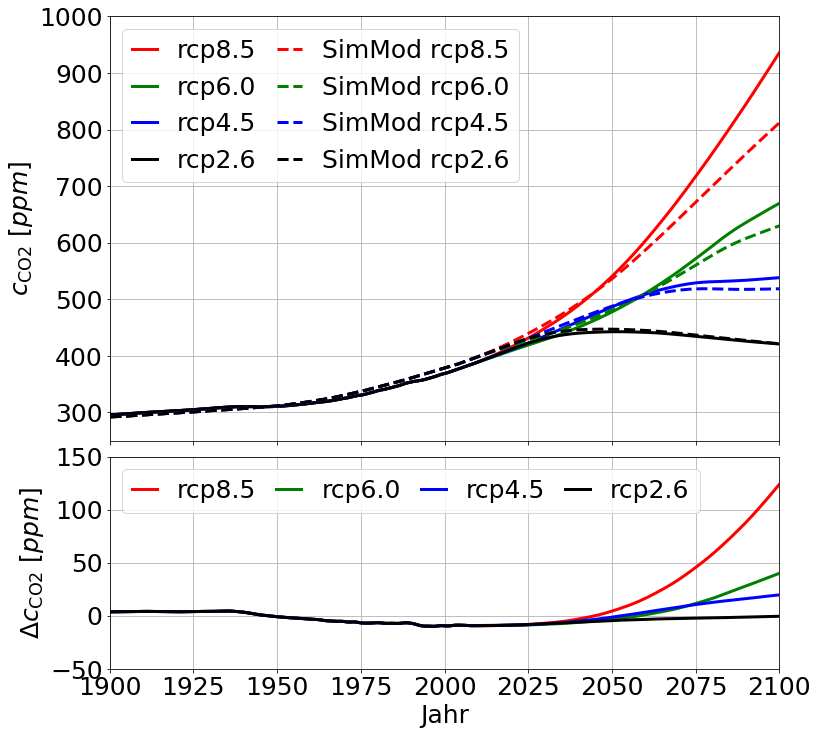

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=FIGURE_SIZE, sharex=True,
                               gridspec_kw=dict(height_ratios=[2/3, 1/3], hspace=0.05))

ax1.plot(rcp85['year'], rcp85['co2_concentration_ppm'], label='rcp8.5', lw=3, c='r')
ax1.plot(rcp60['year'], rcp60['co2_concentration_ppm'], label='rcp6.0', lw=3, c='g')
ax1.plot(rcp45['year'], rcp45['co2_concentration_ppm'], label='rcp4.5', lw=3, c='b')
ax1.plot(rcp26['year'], rcp26['co2_concentration_ppm'], label='rcp2.6', lw=3, c='k')

ax1.plot(simmod85['year'], simmod85['co2_ppm'], label='SimMod rcp8.5', c='r', ls='dashed', lw=3)
ax1.plot(simmod60['year'], simmod60['co2_ppm'], label='SimMod rcp6.0', c='g', ls='dashed', lw=3)
ax1.plot(simmod45['year'], simmod45['co2_ppm'], label='SimMod rcp4.5', c='b', ls='dashed', lw=3)
ax1.plot(simmod26['year'], simmod26['co2_ppm'], label='SimMod rcp2.6', c='k', ls='dashed', lw=3)

ax2.plot(simmod85['year'], -(simmod85['co2_ppm']-rcp85['co2_concentration_ppm']), lw=3, c='r', label='rcp8.5')
ax2.plot(simmod60['year'], -(simmod60['co2_ppm']-rcp60['co2_concentration_ppm']), lw=3, c='g', label='rcp6.0')
ax2.plot(simmod45['year'], -(simmod45['co2_ppm']-rcp45['co2_concentration_ppm']), lw=3, c='b', label='rcp4.5')
ax2.plot(simmod26['year'], -(simmod26['co2_ppm']-rcp26['co2_concentration_ppm']), lw=3, c='k', label='rcp2.6')

ax1.grid()
ax2.grid()
ax2.set_xlabel("Jahr")
ax2.set_ylabel(r"$\Delta c_{\mathrm{CO2}}$ $[ppm]$")
ax1.set_ylabel(r"$c_{\mathrm{CO2}}$ $[ppm]$")
ax1.legend(ncol=2, handlelength=1, columnspacing=0.8)
ax2.legend(ncol=4, loc='upper left', handlelength=1, columnspacing=0.8)

ax2.set_xlim(1900, 2100)
ax1.set_ylim(250, 1000)
ax2.set_ylim(-50, 150)
#plt.savefig("figures/conc_co2.pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()

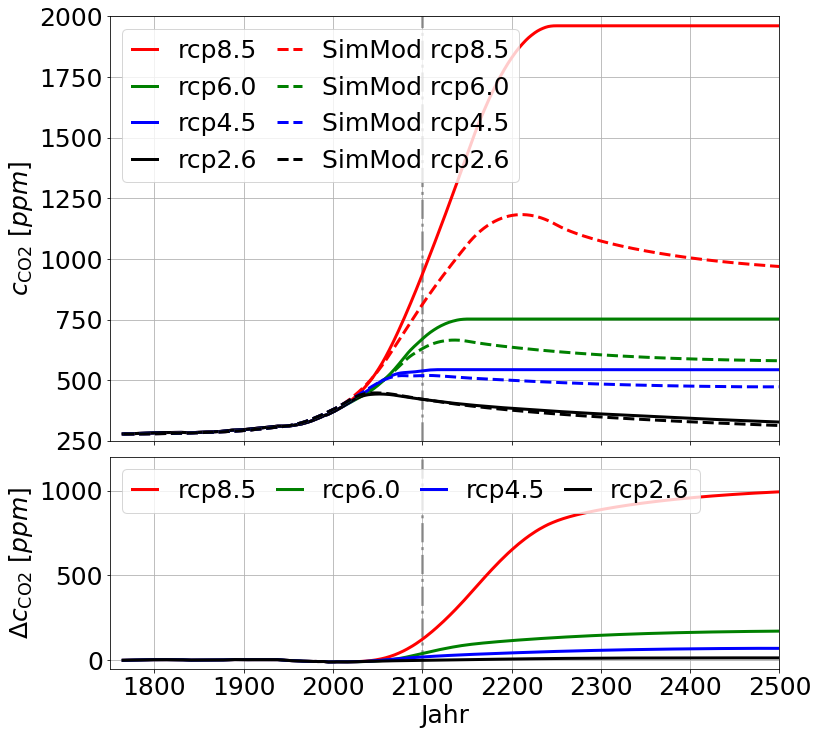

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=FIGURE_SIZE, sharex=True,
                               gridspec_kw=dict(height_ratios=[2/3, 1/3], hspace=0.05))

ax1.plot(rcp85['year'], rcp85['co2_concentration_ppm'], label='rcp8.5', lw=3, c='r')
ax1.plot(rcp60['year'], rcp60['co2_concentration_ppm'], label='rcp6.0', lw=3, c='g')
ax1.plot(rcp45['year'], rcp45['co2_concentration_ppm'], label='rcp4.5', lw=3, c='b')
ax1.plot(rcp26['year'], rcp26['co2_concentration_ppm'], label='rcp2.6', lw=3, c='k')

ax1.plot(simmod85['year'], simmod85['co2_ppm'], label='SimMod rcp8.5', c='r', ls='dashed', lw=3)
ax1.plot(simmod60['year'], simmod60['co2_ppm'], label='SimMod rcp6.0', c='g', ls='dashed', lw=3)
ax1.plot(simmod45['year'], simmod45['co2_ppm'], label='SimMod rcp4.5', c='b', ls='dashed', lw=3)
ax1.plot(simmod26['year'], simmod26['co2_ppm'], label='SimMod rcp2.6', c='k', ls='dashed', lw=3)

ax2.plot(simmod85['year'], -(simmod85['co2_ppm']-rcp85['co2_concentration_ppm']), lw=3, c='r', label='rcp8.5')
ax2.plot(simmod60['year'], -(simmod60['co2_ppm']-rcp60['co2_concentration_ppm']), lw=3, c='g', label='rcp6.0')
ax2.plot(simmod45['year'], -(simmod45['co2_ppm']-rcp45['co2_concentration_ppm']), lw=3, c='b', label='rcp4.5')
ax2.plot(simmod26['year'], -(simmod26['co2_ppm']-rcp26['co2_concentration_ppm']), lw=3, c='k', label='rcp2.6')

ax1.grid()
ax2.grid()
ax2.set_xlabel("Jahr")
ax2.set_ylabel(r"$\Delta c_{\mathrm{CO2}}$ $[ppm]$")
ax1.set_ylabel(r"$c_{\mathrm{CO2}}$ $[ppm]$")
ax1.legend(ncol=2, handlelength=1, columnspacing=0.8)
ax2.legend(ncol=4, loc='upper left', handlelength=1, columnspacing=0.8)

ax1.vlines(2100, ymin=250, ymax=2000, colors=['k'], linestyles='dashdot', alpha=0.3, lw=3)
ax2.vlines(2100, ymin=-50, ymax=1200, colors=['k'], linestyles='dashdot', alpha=0.3, lw=3)

ax2.set_xlim(1750, 2500)
ax1.set_ylim(250, 2000)
ax2.set_ylim(-50, 1200)
#plt.savefig("figures/conc_co2_ext.pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()

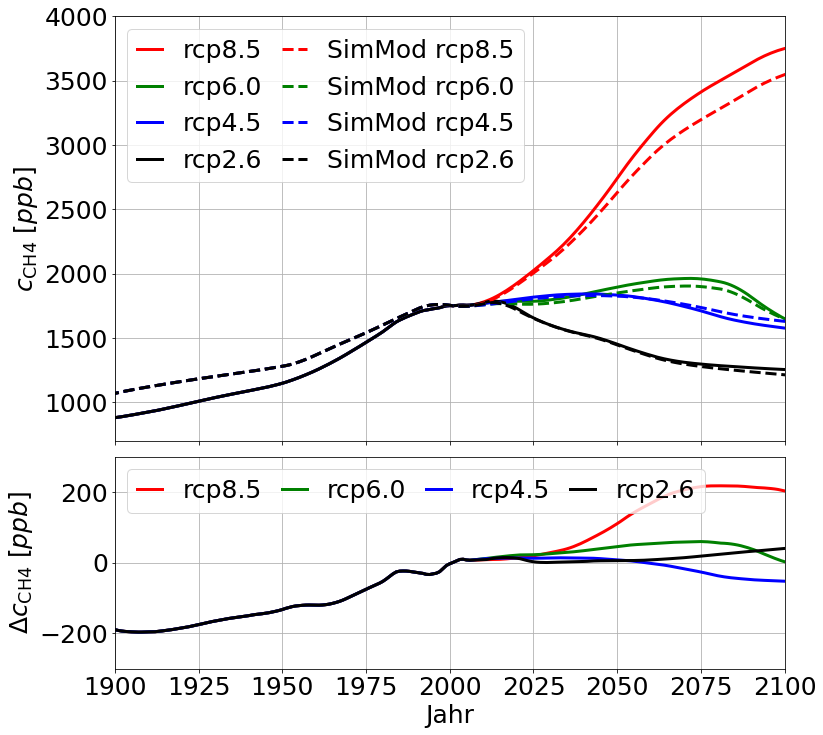

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=FIGURE_SIZE, sharex=True,
                               gridspec_kw=dict(height_ratios=[2/3, 1/3], hspace=0.05))

ax1.plot(rcp85['year'], rcp85['ch4_concentration_ppb'], label='rcp8.5', lw=3, c='r')
ax1.plot(rcp60['year'], rcp60['ch4_concentration_ppb'], label='rcp6.0', lw=3, c='g')
ax1.plot(rcp45['year'], rcp45['ch4_concentration_ppb'], label='rcp4.5', lw=3, c='b')
ax1.plot(rcp26['year'], rcp26['ch4_concentration_ppb'], label='rcp2.6', lw=3, c='k')

ax1.plot(simmod85['year'], simmod85['ch4_ppb'], label='SimMod rcp8.5', c='r', ls='dashed', lw=3)
ax1.plot(simmod60['year'], simmod60['ch4_ppb'], label='SimMod rcp6.0', c='g', ls='dashed', lw=3)
ax1.plot(simmod45['year'], simmod45['ch4_ppb'], label='SimMod rcp4.5', c='b', ls='dashed', lw=3)
ax1.plot(simmod26['year'], simmod26['ch4_ppb'], label='SimMod rcp2.6', c='k', ls='dashed', lw=3)

ax2.plot(simmod85['year'], -(simmod85['ch4_ppb']-rcp85['ch4_concentration_ppb']), lw=3, c='r', label='rcp8.5')
ax2.plot(simmod60['year'], -(simmod60['ch4_ppb']-rcp60['ch4_concentration_ppb']), lw=3, c='g', label='rcp6.0')
ax2.plot(simmod45['year'], -(simmod45['ch4_ppb']-rcp45['ch4_concentration_ppb']), lw=3, c='b', label='rcp4.5')
ax2.plot(simmod26['year'], -(simmod26['ch4_ppb']-rcp26['ch4_concentration_ppb']), lw=3, c='k', label='rcp2.6')

ax1.grid()
ax2.grid()
ax2.set_xlabel("Jahr")
ax2.set_ylabel(r"$\Delta c_{\mathrm{CH4}}$ $[ppb]$")
ax1.set_ylabel(r"$c_{\mathrm{CH4}}$ $[ppb]$")
ax1.legend(ncol=2, handlelength=1, columnspacing=0.8)
ax2.legend(ncol=4, loc='upper left', handlelength=1, columnspacing=0.8)

ax2.set_xlim(1900, 2100)
ax1.set_ylim(700, 4000)
ax2.set_ylim(-300, 300)
#plt.savefig("figures/conc_ch4.pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()

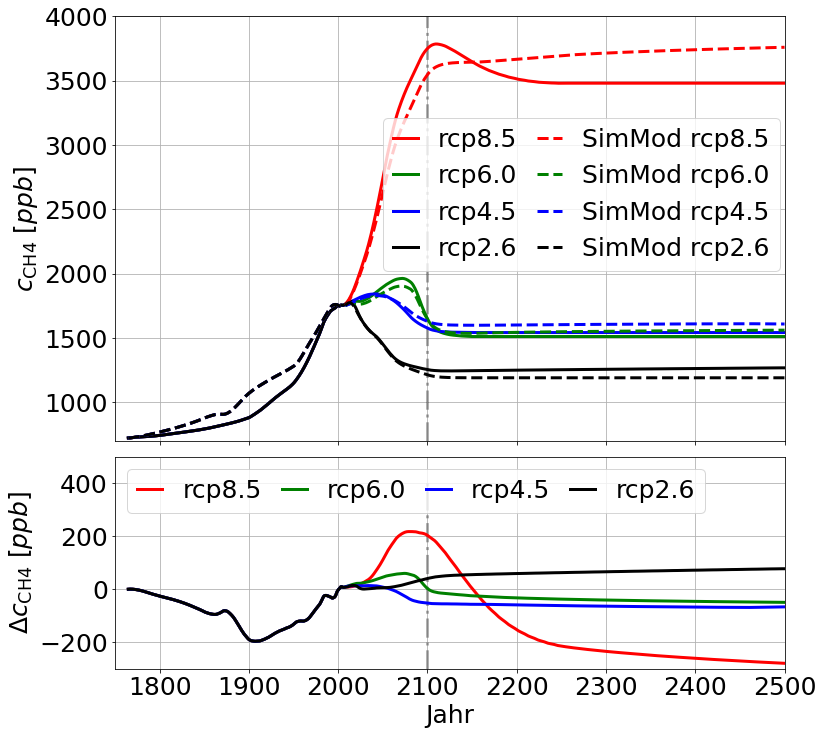

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=FIGURE_SIZE, sharex=True,
                               gridspec_kw=dict(height_ratios=[2/3, 1/3], hspace=0.05))

ax1.plot(rcp85['year'], rcp85['ch4_concentration_ppb'], label='rcp8.5', lw=3, c='r')
ax1.plot(rcp60['year'], rcp60['ch4_concentration_ppb'], label='rcp6.0', lw=3, c='g')
ax1.plot(rcp45['year'], rcp45['ch4_concentration_ppb'], label='rcp4.5', lw=3, c='b')
ax1.plot(rcp26['year'], rcp26['ch4_concentration_ppb'], label='rcp2.6', lw=3, c='k')

ax1.plot(simmod85['year'], simmod85['ch4_ppb'], label='SimMod rcp8.5', c='r', ls='dashed', lw=3)
ax1.plot(simmod60['year'], simmod60['ch4_ppb'], label='SimMod rcp6.0', c='g', ls='dashed', lw=3)
ax1.plot(simmod45['year'], simmod45['ch4_ppb'], label='SimMod rcp4.5', c='b', ls='dashed', lw=3)
ax1.plot(simmod26['year'], simmod26['ch4_ppb'], label='SimMod rcp2.6', c='k', ls='dashed', lw=3)

ax2.plot(simmod85['year'], -(simmod85['ch4_ppb']-rcp85['ch4_concentration_ppb']), lw=3, c='r', label='rcp8.5')
ax2.plot(simmod60['year'], -(simmod60['ch4_ppb']-rcp60['ch4_concentration_ppb']), lw=3, c='g', label='rcp6.0')
ax2.plot(simmod45['year'], -(simmod45['ch4_ppb']-rcp45['ch4_concentration_ppb']), lw=3, c='b', label='rcp4.5')
ax2.plot(simmod26['year'], -(simmod26['ch4_ppb']-rcp26['ch4_concentration_ppb']), lw=3, c='k', label='rcp2.6')

ax1.grid()
ax2.grid()
ax2.set_xlabel("Jahr")
ax2.set_ylabel(r"$\Delta c_{\mathrm{CH4}}$ $[ppb]$")
ax1.set_ylabel(r"$c_{\mathrm{CH4}}$ $[ppb]$")
ax1.legend(ncol=2, handlelength=1, columnspacing=0.8, loc=(0.4,0.4))
ax2.legend(ncol=4, loc='upper left', handlelength=1, columnspacing=0.8)

ax1.vlines(2100, ymin=700, ymax=4000, colors=['k'], linestyles='dashdot', alpha=0.3, lw=3)
ax2.vlines(2100, ymin=-300, ymax=400, colors=['k'], linestyles='dashdot', alpha=0.3, lw=3)

ax2.set_xlim(1750, 2500)
ax1.set_ylim(700, 4000)
ax2.set_ylim(-300, 500)
#plt.savefig("figures/conc_ch4_ext.pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()

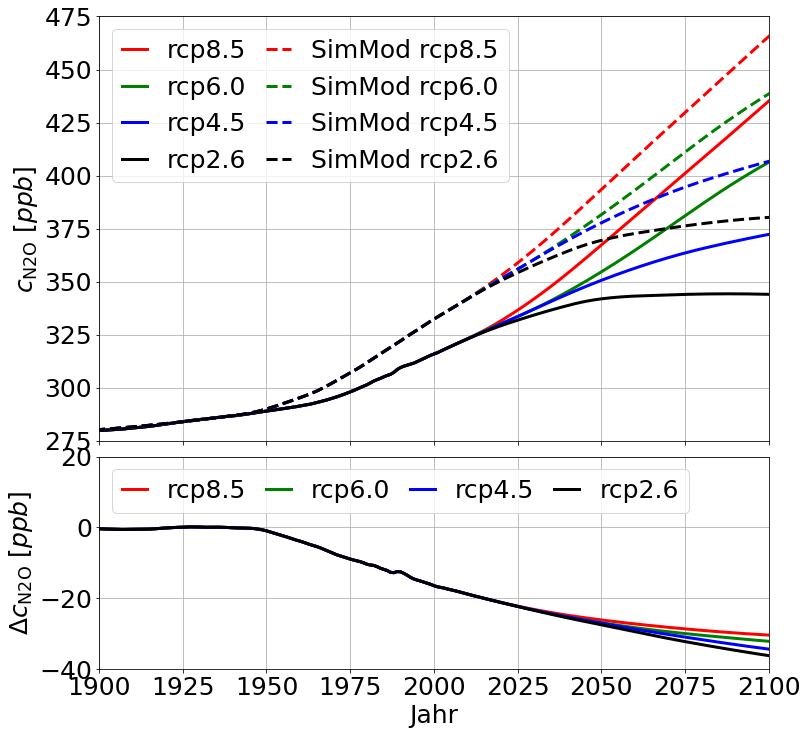

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=FIGURE_SIZE, sharex=True,
                               gridspec_kw=dict(height_ratios=[2/3, 1/3], hspace=0.05))

ax1.plot(rcp85['year'], rcp85['n2o_concentration_ppb'], label='rcp8.5', lw=3, c='r')
ax1.plot(rcp60['year'], rcp60['n2o_concentration_ppb'], label='rcp6.0', lw=3, c='g')
ax1.plot(rcp45['year'], rcp45['n2o_concentration_ppb'], label='rcp4.5', lw=3, c='b')
ax1.plot(rcp26['year'], rcp26['n2o_concentration_ppb'], label='rcp2.6', lw=3, c='k')

ax1.plot(simmod85['year'], simmod85['n2o_ppb'], label='SimMod rcp8.5', c='r', ls='dashed', lw=3)
ax1.plot(simmod60['year'], simmod60['n2o_ppb'], label='SimMod rcp6.0', c='g', ls='dashed', lw=3)
ax1.plot(simmod45['year'], simmod45['n2o_ppb'], label='SimMod rcp4.5', c='b', ls='dashed', lw=3)
ax1.plot(simmod26['year'], simmod26['n2o_ppb'], label='SimMod rcp2.6', c='k', ls='dashed', lw=3)

ax2.plot(simmod85['year'], -(simmod85['n2o_ppb']-rcp85['n2o_concentration_ppb']), lw=3, c='r', label='rcp8.5')
ax2.plot(simmod60['year'], -(simmod60['n2o_ppb']-rcp60['n2o_concentration_ppb']), lw=3, c='g', label='rcp6.0')
ax2.plot(simmod45['year'], -(simmod45['n2o_ppb']-rcp45['n2o_concentration_ppb']), lw=3, c='b', label='rcp4.5')
ax2.plot(simmod26['year'], -(simmod26['n2o_ppb']-rcp26['n2o_concentration_ppb']), lw=3, c='k', label='rcp2.6')

ax1.grid()
ax2.grid()
ax2.set_xlabel("Jahr")
ax2.set_ylabel(r"$\Delta c_{\mathrm{N2O}}$ $[ppb]$")
ax1.set_ylabel(r"$c_{\mathrm{N2O}}$ $[ppb]$")
ax1.legend(ncol=2, handlelength=1, columnspacing=0.8)
ax2.legend(ncol=4, loc='upper left', handlelength=1, columnspacing=0.8)

ax2.set_xlim(1900, 2100)
ax1.set_ylim(275, 475)
ax2.set_ylim(-40, 20)
#plt.savefig("figures/conc_n2o.pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()

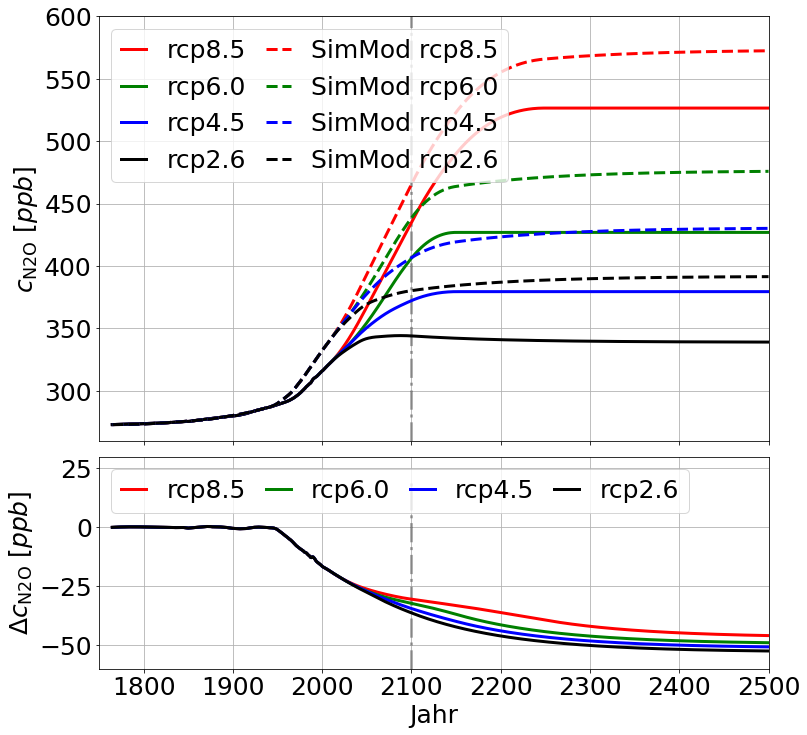

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=FIGURE_SIZE, sharex=True,
                               gridspec_kw=dict(height_ratios=[2/3, 1/3], hspace=0.05))

ax1.plot(rcp85['year'], rcp85['n2o_concentration_ppb'], label='rcp8.5', lw=3, c='r')
ax1.plot(rcp60['year'], rcp60['n2o_concentration_ppb'], label='rcp6.0', lw=3, c='g')
ax1.plot(rcp45['year'], rcp45['n2o_concentration_ppb'], label='rcp4.5', lw=3, c='b')
ax1.plot(rcp26['year'], rcp26['n2o_concentration_ppb'], label='rcp2.6', lw=3, c='k')

ax1.plot(simmod85['year'], simmod85['n2o_ppb'], label='SimMod rcp8.5', c='r', ls='dashed', lw=3)
ax1.plot(simmod60['year'], simmod60['n2o_ppb'], label='SimMod rcp6.0', c='g', ls='dashed', lw=3)
ax1.plot(simmod45['year'], simmod45['n2o_ppb'], label='SimMod rcp4.5', c='b', ls='dashed', lw=3)
ax1.plot(simmod26['year'], simmod26['n2o_ppb'], label='SimMod rcp2.6', c='k', ls='dashed', lw=3)

ax2.plot(simmod85['year'], -(simmod85['n2o_ppb']-rcp85['n2o_concentration_ppb']), lw=3, c='r', label='rcp8.5')
ax2.plot(simmod60['year'], -(simmod60['n2o_ppb']-rcp60['n2o_concentration_ppb']), lw=3, c='g', label='rcp6.0')
ax2.plot(simmod45['year'], -(simmod45['n2o_ppb']-rcp45['n2o_concentration_ppb']), lw=3, c='b', label='rcp4.5')
ax2.plot(simmod26['year'], -(simmod26['n2o_ppb']-rcp26['n2o_concentration_ppb']), lw=3, c='k', label='rcp2.6')

ax1.grid()
ax2.grid()
ax2.set_xlabel("Jahr")
ax2.set_ylabel(r"$\Delta c_{\mathrm{N2O}}$ $[ppb]$")
ax1.set_ylabel(r"$c_{\mathrm{N2O}}$ $[ppb]$")
ax1.legend(ncol=2, handlelength=1, columnspacing=0.8)
ax2.legend(ncol=4, loc='upper left', handlelength=1, columnspacing=0.8)

ax1.vlines(2100, ymin=260, ymax=600, colors=['k'], linestyles='dashdot', alpha=0.3, lw=3)
ax2.vlines(2100, ymin=-60, ymax=20, colors=['k'], linestyles='dashdot', alpha=0.3, lw=3)

ax2.set_xlim(1750, 2500)
ax1.set_ylim(260, 600)
ax2.set_ylim(-60, 30)
#plt.savefig("figures/conc_n2o_ext.pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()

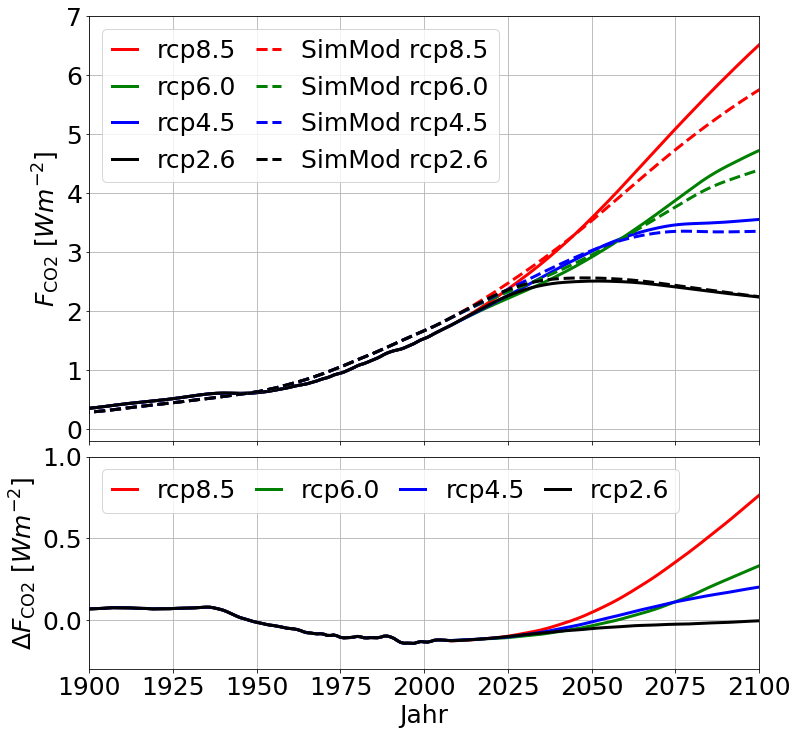

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=FIGURE_SIZE, sharex=True,
                               gridspec_kw=dict(height_ratios=[2/3, 1/3], hspace=0.05))

ax1.plot(rcp85['year'], rcp85['co2_forcing_wm2'], label='rcp8.5', lw=3, c='r')
ax1.plot(rcp60['year'], rcp60['co2_forcing_wm2'], label='rcp6.0', lw=3, c='g')
ax1.plot(rcp45['year'], rcp45['co2_forcing_wm2'], label='rcp4.5', lw=3, c='b')
ax1.plot(rcp26['year'], rcp26['co2_forcing_wm2'], label='rcp2.6', lw=3, c='k')

ax1.plot(simmod85['year'], simmod85['co2_forcing'], label='SimMod rcp8.5', c='r', ls='dashed', lw=3)
ax1.plot(simmod60['year'], simmod60['co2_forcing'], label='SimMod rcp6.0', c='g', ls='dashed', lw=3)
ax1.plot(simmod45['year'], simmod45['co2_forcing'], label='SimMod rcp4.5', c='b', ls='dashed', lw=3)
ax1.plot(simmod26['year'], simmod26['co2_forcing'], label='SimMod rcp2.6', c='k', ls='dashed', lw=3)

ax2.plot(simmod85['year'], -(simmod85['co2_forcing']-rcp85['co2_forcing_wm2']), lw=3, c='r', label='rcp8.5')
ax2.plot(simmod60['year'], -(simmod60['co2_forcing']-rcp60['co2_forcing_wm2']), lw=3, c='g', label='rcp6.0')
ax2.plot(simmod45['year'], -(simmod45['co2_forcing']-rcp45['co2_forcing_wm2']), lw=3, c='b', label='rcp4.5')
ax2.plot(simmod26['year'], -(simmod26['co2_forcing']-rcp26['co2_forcing_wm2']), lw=3, c='k', label='rcp2.6')

ax1.grid()
ax2.grid()
ax2.set_xlabel("Jahr")
ax2.set_ylabel(r"$\Delta F_{\mathrm{CO2}}$ $[Wm^{-2}]$")
ax1.set_ylabel(r"$F_{\mathrm{CO2}}$ $[Wm^{-2}]$")
ax1.legend(ncol=2, handlelength=1, columnspacing=0.8, loc='upper left')
ax2.legend(ncol=4, loc='upper left', handlelength=1, columnspacing=0.8)

ax2.set_xlim(1900, 2100)
ax1.set_ylim(-0.2, 7.)
ax2.set_ylim(-0.3, 1.)
#plt.savefig("figures/forc_co2.pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()

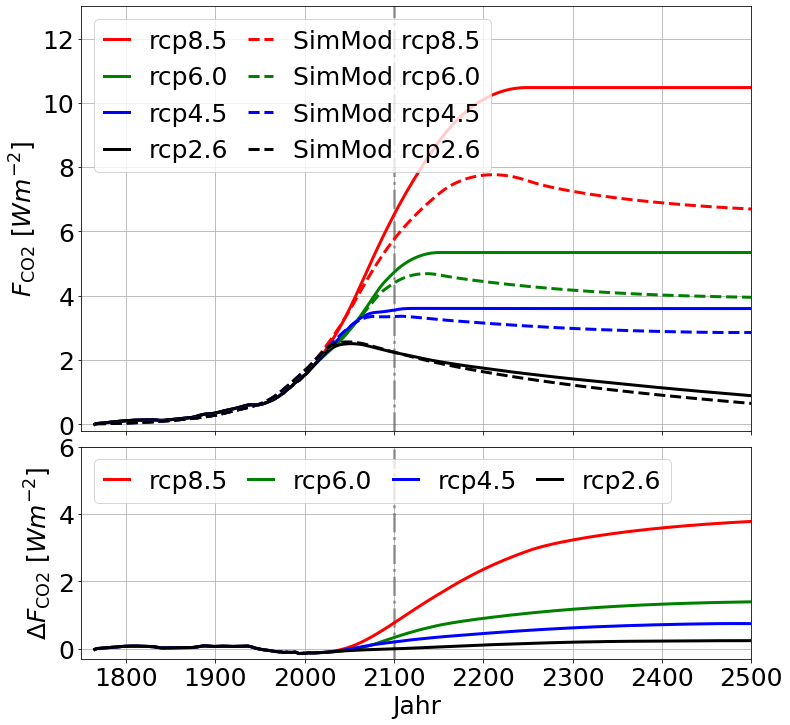

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=FIGURE_SIZE, sharex=True,
                               gridspec_kw=dict(height_ratios=[2/3, 1/3], hspace=0.05))

ax1.plot(rcp85['year'], rcp85['co2_forcing_wm2'], label='rcp8.5', lw=3, c='r')
ax1.plot(rcp60['year'], rcp60['co2_forcing_wm2'], label='rcp6.0', lw=3, c='g')
ax1.plot(rcp45['year'], rcp45['co2_forcing_wm2'], label='rcp4.5', lw=3, c='b')
ax1.plot(rcp26['year'], rcp26['co2_forcing_wm2'], label='rcp2.6', lw=3, c='k')

ax1.plot(simmod85['year'], simmod85['co2_forcing'], label='SimMod rcp8.5', c='r', ls='dashed', lw=3)
ax1.plot(simmod60['year'], simmod60['co2_forcing'], label='SimMod rcp6.0', c='g', ls='dashed', lw=3)
ax1.plot(simmod45['year'], simmod45['co2_forcing'], label='SimMod rcp4.5', c='b', ls='dashed', lw=3)
ax1.plot(simmod26['year'], simmod26['co2_forcing'], label='SimMod rcp2.6', c='k', ls='dashed', lw=3)

ax2.plot(simmod85['year'], -(simmod85['co2_forcing']-rcp85['co2_forcing_wm2']), lw=3, c='r', label='rcp8.5')
ax2.plot(simmod60['year'], -(simmod60['co2_forcing']-rcp60['co2_forcing_wm2']), lw=3, c='g', label='rcp6.0')
ax2.plot(simmod45['year'], -(simmod45['co2_forcing']-rcp45['co2_forcing_wm2']), lw=3, c='b', label='rcp4.5')
ax2.plot(simmod26['year'], -(simmod26['co2_forcing']-rcp26['co2_forcing_wm2']), lw=3, c='k', label='rcp2.6')

ax1.grid()
ax2.grid()
ax2.set_xlabel("Jahr")
ax2.set_ylabel(r"$\Delta F_{\mathrm{CO2}}$ $[Wm^{-2}]$")
ax1.set_ylabel(r"$F_{\mathrm{CO2}}$ $[Wm^{-2}]$")
ax1.legend(ncol=2, handlelength=1, columnspacing=0.8)
ax2.legend(ncol=4, loc='upper left', handlelength=1, columnspacing=0.8)

ax1.vlines(2100, ymin=-0.2, ymax=13., colors=['k'], linestyles='dashdot', alpha=0.3, lw=3)
ax2.vlines(2100, ymin=-0.3, ymax=6., colors=['k'], linestyles='dashdot', alpha=0.3, lw=3)

ax2.set_xlim(1750, 2500)
ax1.set_ylim(-0.2, 13.)
ax2.set_ylim(-0.3, 6.)
#plt.savefig("figures/forc_co2_ext.pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()

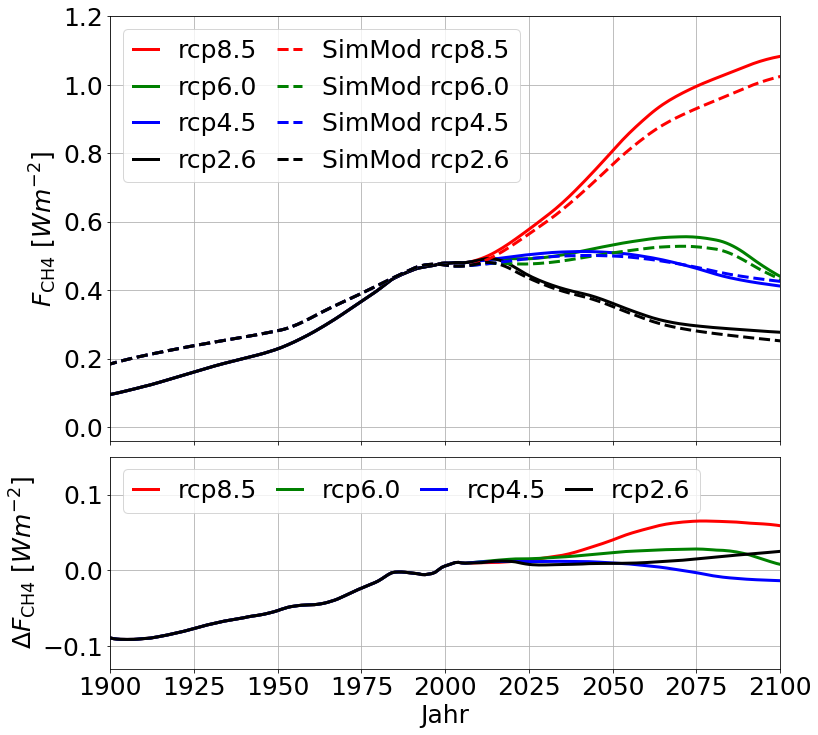

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=FIGURE_SIZE, sharex=True,
                               gridspec_kw=dict(height_ratios=[2/3, 1/3], hspace=0.05))

ax1.plot(rcp85['year'], rcp85['ch4_forcing_wm2'], label='rcp8.5', lw=3, c='r')
ax1.plot(rcp60['year'], rcp60['ch4_forcing_wm2'], label='rcp6.0', lw=3, c='g')
ax1.plot(rcp45['year'], rcp45['ch4_forcing_wm2'], label='rcp4.5', lw=3, c='b')
ax1.plot(rcp26['year'], rcp26['ch4_forcing_wm2'], label='rcp2.6', lw=3, c='k')

ax1.plot(simmod85['year'], simmod85['ch4_forcing'], label='SimMod rcp8.5', c='r', ls='dashed', lw=3)
ax1.plot(simmod60['year'], simmod60['ch4_forcing'], label='SimMod rcp6.0', c='g', ls='dashed', lw=3)
ax1.plot(simmod45['year'], simmod45['ch4_forcing'], label='SimMod rcp4.5', c='b', ls='dashed', lw=3)
ax1.plot(simmod26['year'], simmod26['ch4_forcing'], label='SimMod rcp2.6', c='k', ls='dashed', lw=3)

ax2.plot(simmod85['year'], -(simmod85['ch4_forcing']-rcp85['ch4_forcing_wm2']), lw=3, c='r', label='rcp8.5')
ax2.plot(simmod60['year'], -(simmod60['ch4_forcing']-rcp60['ch4_forcing_wm2']), lw=3, c='g', label='rcp6.0')
ax2.plot(simmod45['year'], -(simmod45['ch4_forcing']-rcp45['ch4_forcing_wm2']), lw=3, c='b', label='rcp4.5')
ax2.plot(simmod26['year'], -(simmod26['ch4_forcing']-rcp26['ch4_forcing_wm2']), lw=3, c='k', label='rcp2.6')

ax1.grid()
ax2.grid()
ax2.set_xlabel("Jahr")
ax2.set_ylabel(r"$\Delta F_{\mathrm{CH4}}$ $[Wm^{-2}]$")
ax1.set_ylabel(r"$F_{\mathrm{CH4}}$ $[Wm^{-2}]$")
ax1.legend(ncol=2, handlelength=1, columnspacing=0.8)
ax2.legend(ncol=4, loc='upper left', handlelength=1, columnspacing=0.8)

ax2.set_xlim(1900, 2100)
ax1.set_ylim(-0.04, 1.2)
ax2.set_ylim(-0.13, 0.15)
#plt.savefig("figures/forc_ch4.pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()

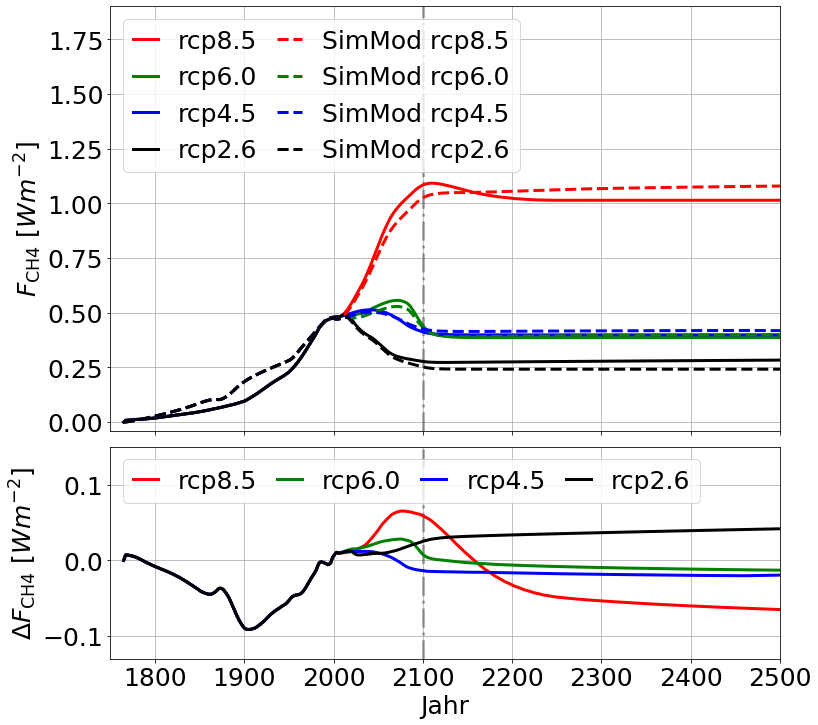

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=FIGURE_SIZE, sharex=True,
                               gridspec_kw=dict(height_ratios=[2/3, 1/3], hspace=0.05))

ax1.plot(rcp85['year'], rcp85['ch4_forcing_wm2'], label='rcp8.5', lw=3, c='r')
ax1.plot(rcp60['year'], rcp60['ch4_forcing_wm2'], label='rcp6.0', lw=3, c='g')
ax1.plot(rcp45['year'], rcp45['ch4_forcing_wm2'], label='rcp4.5', lw=3, c='b')
ax1.plot(rcp26['year'], rcp26['ch4_forcing_wm2'], label='rcp2.6', lw=3, c='k')

ax1.plot(simmod85['year'], simmod85['ch4_forcing'], label='SimMod rcp8.5', c='r', ls='dashed', lw=3)
ax1.plot(simmod60['year'], simmod60['ch4_forcing'], label='SimMod rcp6.0', c='g', ls='dashed', lw=3)
ax1.plot(simmod45['year'], simmod45['ch4_forcing'], label='SimMod rcp4.5', c='b', ls='dashed', lw=3)
ax1.plot(simmod26['year'], simmod26['ch4_forcing'], label='SimMod rcp2.6', c='k', ls='dashed', lw=3)

ax2.plot(simmod85['year'], -(simmod85['ch4_forcing']-rcp85['ch4_forcing_wm2']), lw=3, c='r', label='rcp8.5')
ax2.plot(simmod60['year'], -(simmod60['ch4_forcing']-rcp60['ch4_forcing_wm2']), lw=3, c='g', label='rcp6.0')
ax2.plot(simmod45['year'], -(simmod45['ch4_forcing']-rcp45['ch4_forcing_wm2']), lw=3, c='b', label='rcp4.5')
ax2.plot(simmod26['year'], -(simmod26['ch4_forcing']-rcp26['ch4_forcing_wm2']), lw=3, c='k', label='rcp2.6')

ax1.grid()
ax2.grid()
ax2.set_xlabel("Jahr")
ax2.set_ylabel(r"$\Delta F_{\mathrm{CH4}}$ $[Wm^{-2}]$")
ax1.set_ylabel(r"$F_{\mathrm{CH4}}$ $[Wm^{-2}]$")
ax1.legend(ncol=2, handlelength=1, columnspacing=0.8, loc='upper left')
ax2.legend(ncol=4, loc='upper left', handlelength=1, columnspacing=0.8)

ax1.vlines(2100, ymin=-0.04, ymax=1.9, colors=['k'], linestyles='dashdot', alpha=0.3, lw=3)
ax2.vlines(2100, ymin=-0.13, ymax=0.15, colors=['k'], linestyles='dashdot', alpha=0.3, lw=3)

ax2.set_xlim(1750, 2500)
ax1.set_ylim(-0.04, 1.9)
ax2.set_ylim(-0.13, 0.15)
#plt.savefig("figures/forc_ch4_ext.pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()

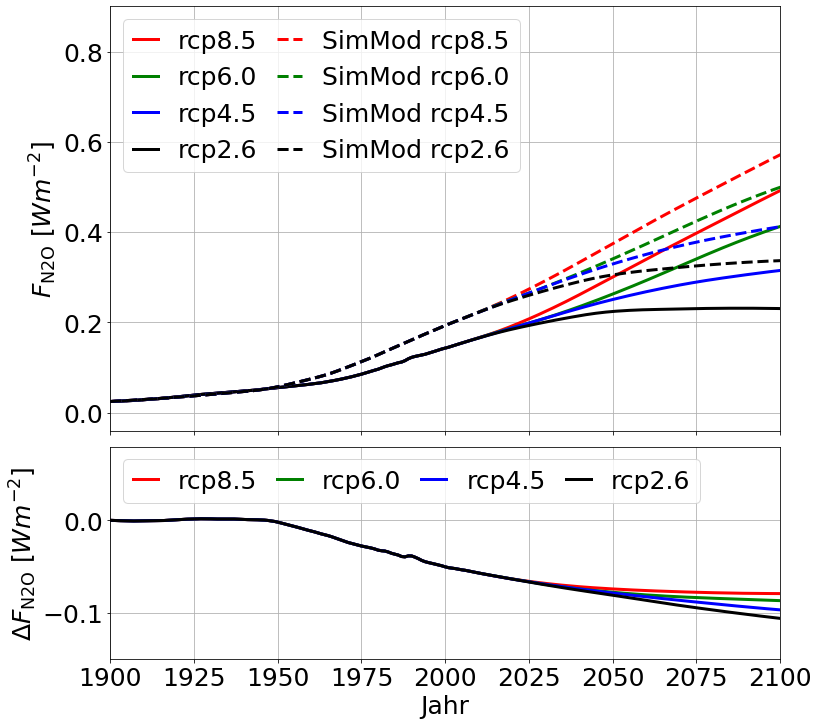

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=FIGURE_SIZE, sharex=True,
                               gridspec_kw=dict(height_ratios=[2/3, 1/3], hspace=0.05))

ax1.plot(rcp85['year'], rcp85['n2o_forcing_wm2'], label='rcp8.5', lw=3, c='r')
ax1.plot(rcp60['year'], rcp60['n2o_forcing_wm2'], label='rcp6.0', lw=3, c='g')
ax1.plot(rcp45['year'], rcp45['n2o_forcing_wm2'], label='rcp4.5', lw=3, c='b')
ax1.plot(rcp26['year'], rcp26['n2o_forcing_wm2'], label='rcp2.6', lw=3, c='k')

ax1.plot(simmod85['year'], simmod85['n2o_forcing'], label='SimMod rcp8.5', c='r', ls='dashed', lw=3)
ax1.plot(simmod60['year'], simmod60['n2o_forcing'], label='SimMod rcp6.0', c='g', ls='dashed', lw=3)
ax1.plot(simmod45['year'], simmod45['n2o_forcing'], label='SimMod rcp4.5', c='b', ls='dashed', lw=3)
ax1.plot(simmod26['year'], simmod26['n2o_forcing'], label='SimMod rcp2.6', c='k', ls='dashed', lw=3)

ax2.plot(simmod85['year'], -(simmod85['n2o_forcing']-rcp85['n2o_forcing_wm2']), lw=3, c='r', label='rcp8.5')
ax2.plot(simmod60['year'], -(simmod60['n2o_forcing']-rcp60['n2o_forcing_wm2']), lw=3, c='g', label='rcp6.0')
ax2.plot(simmod45['year'], -(simmod45['n2o_forcing']-rcp45['n2o_forcing_wm2']), lw=3, c='b', label='rcp4.5')
ax2.plot(simmod26['year'], -(simmod26['n2o_forcing']-rcp26['n2o_forcing_wm2']), lw=3, c='k', label='rcp2.6')

ax1.grid()
ax2.grid()
ax2.set_xlabel("Jahr")
ax2.set_ylabel(r"$\Delta F_{\mathrm{N2O}}$ $[Wm^{-2}]$")
ax1.set_ylabel(r"$F_{\mathrm{N2O}}$ $[Wm^{-2}]$")
ax1.legend(ncol=2, handlelength=1, columnspacing=0.8)
ax2.legend(ncol=4, loc='upper left', handlelength=1, columnspacing=0.8)

ax2.set_xlim(1900, 2100)
ax1.set_ylim(-0.04, 0.9)
ax2.set_ylim(-0.15, 0.08)
#plt.savefig("figures/forc_n2o.pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()

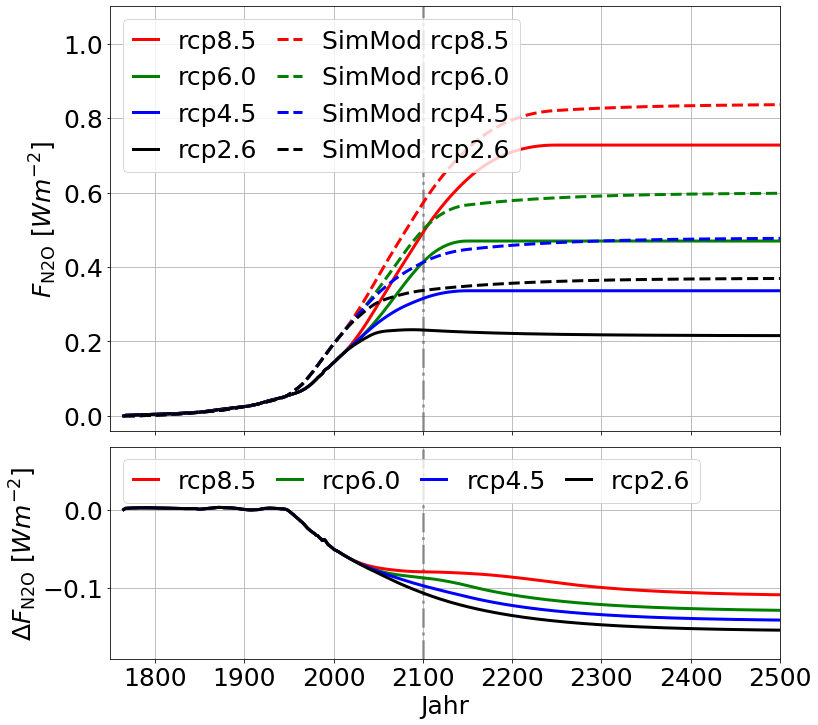

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=FIGURE_SIZE, sharex=True,
                               gridspec_kw=dict(height_ratios=[2/3, 1/3], hspace=0.05))

ax1.plot(rcp85['year'], rcp85['n2o_forcing_wm2'], label='rcp8.5', lw=3, c='r')
ax1.plot(rcp60['year'], rcp60['n2o_forcing_wm2'], label='rcp6.0', lw=3, c='g')
ax1.plot(rcp45['year'], rcp45['n2o_forcing_wm2'], label='rcp4.5', lw=3, c='b')
ax1.plot(rcp26['year'], rcp26['n2o_forcing_wm2'], label='rcp2.6', lw=3, c='k')

ax1.plot(simmod85['year'], simmod85['n2o_forcing'], label='SimMod rcp8.5', c='r', ls='dashed', lw=3)
ax1.plot(simmod60['year'], simmod60['n2o_forcing'], label='SimMod rcp6.0', c='g', ls='dashed', lw=3)
ax1.plot(simmod45['year'], simmod45['n2o_forcing'], label='SimMod rcp4.5', c='b', ls='dashed', lw=3)
ax1.plot(simmod26['year'], simmod26['n2o_forcing'], label='SimMod rcp2.6', c='k', ls='dashed', lw=3)

ax2.plot(simmod85['year'], -(simmod85['n2o_forcing']-rcp85['n2o_forcing_wm2']), lw=3, c='r', label='rcp8.5')
ax2.plot(simmod60['year'], -(simmod60['n2o_forcing']-rcp60['n2o_forcing_wm2']), lw=3, c='g', label='rcp6.0')
ax2.plot(simmod45['year'], -(simmod45['n2o_forcing']-rcp45['n2o_forcing_wm2']), lw=3, c='b', label='rcp4.5')
ax2.plot(simmod26['year'], -(simmod26['n2o_forcing']-rcp26['n2o_forcing_wm2']), lw=3, c='k', label='rcp2.6')

ax1.grid()
ax2.grid()
ax2.set_xlabel("Jahr")
ax2.set_ylabel(r"$\Delta F_{\mathrm{N2O}}$ $[Wm^{-2}]$")
ax1.set_ylabel(r"$F_{\mathrm{N2O}}$ $[Wm^{-2}]$")
ax1.legend(ncol=2, handlelength=1, columnspacing=0.8)
ax2.legend(ncol=4, loc='upper left', handlelength=1, columnspacing=0.8)

ax1.vlines(2100, ymin=-0.04, ymax=1.1, colors=['k'], linestyles='dashdot', alpha=0.3, lw=3)
ax2.vlines(2100, ymin=-0.19, ymax=0.08, colors=['k'], linestyles='dashdot', alpha=0.3, lw=3)

ax2.set_xlim(1750, 2500)
ax1.set_ylim(-0.04, 1.1)
ax2.set_ylim(-0.19, 0.08)
#plt.savefig("figures/forc_n2o_ext.pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()

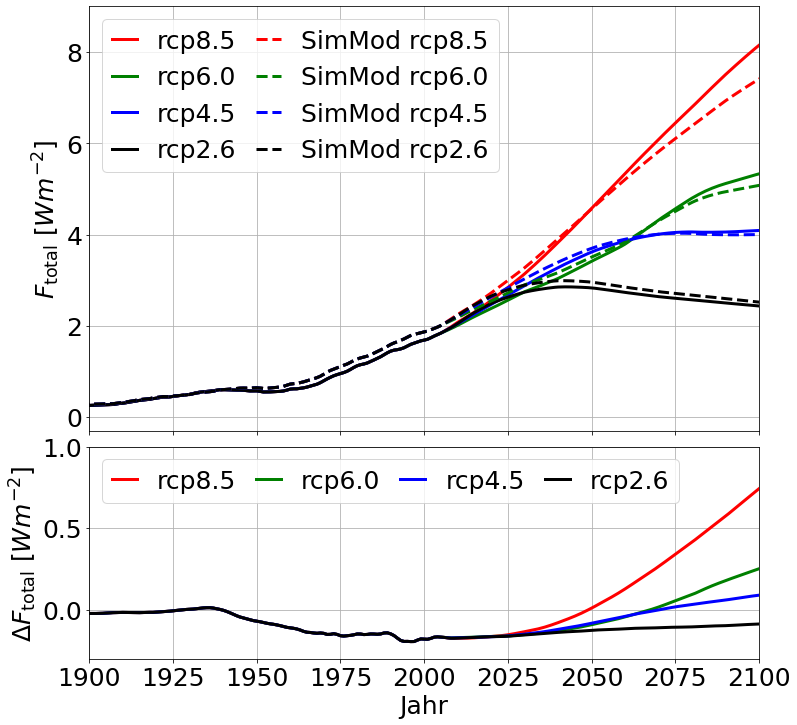

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=FIGURE_SIZE, sharex=True,
                               gridspec_kw=dict(height_ratios=[2/3, 1/3], hspace=0.05))

ax1.plot(rcp85['year'], rcp85['total_forcing_wm2'], label='rcp8.5', lw=3, c='r')
ax1.plot(rcp60['year'], rcp60['total_forcing_wm2'], label='rcp6.0', lw=3, c='g')
ax1.plot(rcp45['year'], rcp45['total_forcing_wm2'], label='rcp4.5', lw=3, c='b')
ax1.plot(rcp26['year'], rcp26['total_forcing_wm2'], label='rcp2.6', lw=3, c='k')

ax1.plot(simmod85['year'], simmod85['total_forcing'], label='SimMod rcp8.5', c='r', ls='dashed', lw=3)
ax1.plot(simmod60['year'], simmod60['total_forcing'], label='SimMod rcp6.0', c='g', ls='dashed', lw=3)
ax1.plot(simmod45['year'], simmod45['total_forcing'], label='SimMod rcp4.5', c='b', ls='dashed', lw=3)
ax1.plot(simmod26['year'], simmod26['total_forcing'], label='SimMod rcp2.6', c='k', ls='dashed', lw=3)

ax2.plot(simmod85['year'], -(simmod85['total_forcing']-rcp85['total_forcing_wm2']), lw=3, c='r', label='rcp8.5')
ax2.plot(simmod60['year'], -(simmod60['total_forcing']-rcp60['total_forcing_wm2']), lw=3, c='g', label='rcp6.0')
ax2.plot(simmod45['year'], -(simmod45['total_forcing']-rcp45['total_forcing_wm2']), lw=3, c='b', label='rcp4.5')
ax2.plot(simmod26['year'], -(simmod26['total_forcing']-rcp26['total_forcing_wm2']), lw=3, c='k', label='rcp2.6')

ax1.grid()
ax2.grid()
ax2.set_xlabel("Jahr")
ax2.set_ylabel(r"$\Delta F_{\mathrm{total}}$ $[Wm^{-2}]$")
ax1.set_ylabel(r"$ F_{\mathrm{total}}$ $[Wm^{-2}]$")
ax1.legend(ncol=2, handlelength=1, columnspacing=0.8)
ax2.legend(ncol=4, loc='upper left', handlelength=1, columnspacing=0.8)

ax2.set_xlim(1900, 2100)
ax1.set_ylim(-0.3, 9)
ax2.set_ylim(-0.3, 1)
#plt.savefig("figures/forcing_total.pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()

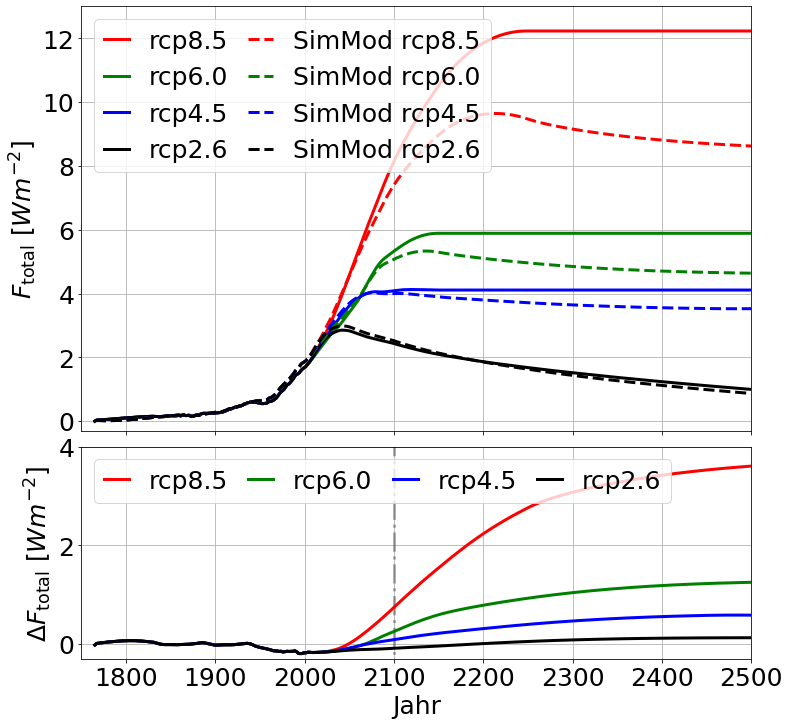

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=FIGURE_SIZE, sharex=True,
                               gridspec_kw=dict(height_ratios=[2/3, 1/3], hspace=0.05))

ax1.plot(rcp85['year'], rcp85['total_forcing_wm2'], label='rcp8.5', lw=3, c='r')
ax1.plot(rcp60['year'], rcp60['total_forcing_wm2'], label='rcp6.0', lw=3, c='g')
ax1.plot(rcp45['year'], rcp45['total_forcing_wm2'], label='rcp4.5', lw=3, c='b')
ax1.plot(rcp26['year'], rcp26['total_forcing_wm2'], label='rcp2.6', lw=3, c='k')

ax1.plot(simmod85['year'], simmod85['total_forcing'], label='SimMod rcp8.5', c='r', ls='dashed', lw=3)
ax1.plot(simmod60['year'], simmod60['total_forcing'], label='SimMod rcp6.0', c='g', ls='dashed', lw=3)
ax1.plot(simmod45['year'], simmod45['total_forcing'], label='SimMod rcp4.5', c='b', ls='dashed', lw=3)
ax1.plot(simmod26['year'], simmod26['total_forcing'], label='SimMod rcp2.6', c='k', ls='dashed', lw=3)

ax2.plot(simmod85['year'], -(simmod85['total_forcing']-rcp85['total_forcing_wm2']), lw=3, c='r', label='rcp8.5')
ax2.plot(simmod60['year'], -(simmod60['total_forcing']-rcp60['total_forcing_wm2']), lw=3, c='g', label='rcp6.0')
ax2.plot(simmod45['year'], -(simmod45['total_forcing']-rcp45['total_forcing_wm2']), lw=3, c='b', label='rcp4.5')
ax2.plot(simmod26['year'], -(simmod26['total_forcing']-rcp26['total_forcing_wm2']), lw=3, c='k', label='rcp2.6')

ax1.grid()
ax2.grid()
ax2.set_xlabel("Jahr")
ax2.set_ylabel(r"$\Delta F_{\mathrm{total}}$ $[Wm^{-2}]$")
ax1.set_ylabel(r"$ F_{\mathrm{total}}$ $[Wm^{-2}]$")
ax1.legend(ncol=2, handlelength=1, columnspacing=0.8)
ax2.legend(ncol=4, loc='upper left', handlelength=1, columnspacing=0.8)

ax1.vlines(2100, ymin=275, ymax=600, colors=['k'], linestyles='dashdot', alpha=0.3, lw=3)
ax2.vlines(2100, ymin=-60, ymax=20, colors=['k'], linestyles='dashdot', alpha=0.3, lw=3)

ax2.set_xlim(1750, 2500)
ax1.set_ylim(-0.3, 13)
ax2.set_ylim(-0.3, 4)
#plt.savefig("figures/forcing_total_ext.pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()